# CH6 Classification-Model Training and Evaluation

1. KNN ALgorithm(K-nearest-neighbour) 
2. Decision Tree Algorithm

KNN -> Classifcation and Regression Task
1. Data prepration
2. Choose k
3. Compute distance(euclidean,manhattan,minkowski)
4. identify neighbors
5. make prediction

In [1]:
import pandas as pd
d=pd.read_csv("diabetes.csv")
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
d.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
x=d.iloc[:,0:8]
y=d.iloc[:,8]
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [66]:
from sklearn.neighbors import KNeighborsClassifier
nn=KNeighborsClassifier(n_neighbors=15)
model=nn.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 1 0 0]


In [67]:
diff=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
diff

,Actual,Predicted
285,0,1
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
563,0,0
318,0,0
154,1,1
684,0,0


In [9]:
diff.to_csv('diabetes_data.csv')

In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[89, 10],
       [23, 32]], dtype=int64)

In [69]:
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]
print(TN,FP,FN,TP)

89 10 23 32


In [70]:
#Model acurracy
accuracy=(TN+TP)/(TN+FP+FN+TP)
print(accuracy)

0.7857142857142857


In [87]:
#OR method to calc accuracy of model
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(y_test,y_pred)
print(accuracy1)
import sklearn.metrics
print(sklearn.metrics.recall_score(y_test,y_pred))#senstivity
print(sklearn.metrics.recall_score(y_test,y_pred,pos_label=0))#specificity
print(sklearn.metrics.precision_score(y_test,y_pred))

0.7857142857142857
0.5818181818181818
0.898989898989899
0.7619047619047619


In [88]:
senstivity=(TP)/(TP+FN)
print(senstivity)
specificity=(TN)/(TN+FP)
print(specificity)
precision=(TP)/(TP+FP)
print(precision)

0.5818181818181818
0.898989898989899
0.7619047619047619


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
ac=[]
for i in range(1,41):
    nn=KNeighborsClassifier(n_neighbors=i)
    model=nn.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy1=accuracy_score(y_test,y_pred)
    ac.append(accuracy1)
i=max(ac)
print(i)

0.7857142857142857


# Error rate

- Error rate-> ERROR RATE=FP+FN/TP+FP+FN+TN
- Senstivity -> measures the proportion of TP examples or positive cases which were corretly classified.
                senstivity=TP/TP+FN
- Specificity -> measures of proportion of negative examples which have been correctly classified.
                specificity=TN/TN+FP
- Precision -> % truly positive,positive predicted
               precision=TP/TP+FP

# 6-05-25

In [1]:
import pandas as pd
df=pd.read_csv("tshirt.csv")
df

,Height,Wight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [2]:
x=df.iloc[:,0:2]
y=df.iloc[:,2]
print(x.shape)
print(y.shape)

(18, 2)
(18,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
nn=KNeighborsClassifier(n_neighbors=9)
model=nn.fit(x,y)
y_pred=model.predict(x)
print(y_pred)

['M' 'M' 'M' 'M' 'M' 'M' 'L' 'M' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L']


In [10]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
cm

array([[10,  1],
       [ 1,  6]], dtype=int64)

In [11]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(y,y_pred)
print(accuracy1)

0.8888888888888888


In [19]:
import sklearn.metrics
print(sklearn.metrics.recall_score(y,y_pred,pos_label='L'))#negative specificity
print(sklearn.metrics.recall_score(y,y_pred,pos_label='M'))#positive senstivity

0.9090909090909091
0.8571428571428571


In [20]:
pd.get_dummies(df,drop_first=True)

,Height,Wight,Size_M
0,158,58,1
1,158,59,1
2,158,63,1
3,160,59,1
4,160,60,1
5,163,60,1
6,163,61,1
7,160,64,0
8,163,64,0
9,165,61,0


In [21]:
from sklearn import metrics
print(metrics.classification_report(y,y_pred))

              precision    recall  f1-score   support

           L       0.91      0.91      0.91        11
           M       0.86      0.86      0.86         7

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



In [22]:
ap=pd.read_csv("AptitudeCommunication.csv")
ap

,Name,Aptitude,Communication,Class
0,Karuna,2,5.0,Speaker
1,Bhavan,2,6.0,Speaker
2,Gaurav,7,6.0,Leader
3,Parul,7,2.5,Intel
4,Dinesh,8,6.0,Leader
5,Jani,4,7.0,Speaker
6,Bobby,5,3.0,Intel
7,Parimal,3,5.5,Speaker
8,Govind,8,3.0,Intel
9,Sushant,6,5.5,Leader


In [24]:
x=ap.iloc[:,1:3]
y=ap.iloc[:,3]
print(x.shape)
print(y.shape)

(14, 2)
(14,)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
nn=KNeighborsClassifier(n_neighbors=7)
model=nn.fit(x,y)
y_pred=model.predict(x)
print(y_pred)

['Speaker' 'Speaker' 'Leader' 'Intel' 'Leader' 'Speaker' 'Intel' 'Speaker'
 'Intel' 'Leader' 'Intel' 'Leader' 'Intel' 'Leader']


In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
cm

array([[5, 0, 0],
       [0, 5, 0],
       [0, 0, 4]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(y,y_pred)
print(accuracy1)

1.0


In [39]:
a=model.predict([[4,5.5]])
a

array(['Speaker'], dtype=object)

In [40]:
#Q
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [42]:
df['Gender']=np.where(df['Gender']=='Female',0,1)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [44]:
x=df.iloc[:,1:4]
y=df.iloc[:,4]
print(x.shape)
print(y.shape)

(400, 3)
(400,)


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


In [47]:
from sklearn.neighbors import KNeighborsClassifier
nn=KNeighborsClassifier(n_neighbors=15)
model=nn.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0
 1 0 1 0 0 0]


In [48]:
diff=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
diff

,Actual,Predicted
209,0,0
280,1,0
33,0,0
210,1,1
93,0,1
...,...,...
246,0,0
227,1,1
369,1,0
176,0,0


In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[47,  5],
       [13, 15]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(y_test,y_pred)
print(accuracy1)

0.775


In [51]:
print(sklearn.metrics.recall_score(y_test,y_pred))#senstivity 
print(sklearn.metrics.recall_score(y_test,y_pred,pos_label=0))#specificity

0.5357142857142857
0.9038461538461539


In [52]:
#Q find multiple,polynomial and knn
f=pd.read_csv("Fish.csv")
f

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [53]:
#knn
x=f.iloc[:,1:]
y=f['Species']
print(x.shape)
print(y.shape)

(159, 6)
(159,)


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(127, 6)
(32, 6)
(127,)
(32,)


In [71]:
from sklearn.neighbors import KNeighborsClassifier
nn=KNeighborsClassifier(n_neighbors=25)
model=nn.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

['Perch' 'Smelt' 'Perch' 'Perch' 'Perch' 'Perch' 'Smelt' 'Perch' 'Perch'
 'Perch' 'Bream' 'Perch' 'Bream' 'Perch' 'Bream' 'Perch' 'Perch' 'Roach'
 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Perch' 'Perch' 'Perch'
 'Perch' 'Smelt' 'Smelt' 'Bream' 'Perch']


In [72]:
diff=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
diff

,Actual,Predicted
78,Perch,Perch
155,Smelt,Smelt
128,Pike,Perch
55,Whitefish,Perch
94,Perch,Perch
29,Bream,Perch
147,Smelt,Smelt
51,Roach,Perch
98,Perch,Perch
141,Pike,Perch


In [73]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[7, 0, 3, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 8, 0, 1, 0, 0],
       [1, 0, 2, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0],
       [0, 0, 3, 0, 0, 0, 0]], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(y_test,y_pred)
print(accuracy1)

0.625


In [76]:
#Multiple linear regression
x=f.iloc[:,2:]
y=f['Weight']
print(x.shape)
print(y.shape)

(159, 5)
(159,)


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(127, 5)
(32, 5)
(127,)
(32,)


In [78]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
diff=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(diff)

[  77.68563317 -159.12460639  385.1673549   300.26119445  179.41023158
  775.66726232 -214.43415538  274.90963757  268.44510975 1116.01153223
  610.12007978  786.34393233  585.01831604  172.12366335  652.8595541
  785.41425179  926.40448191  351.83433222  256.32442006  587.20219745
 -175.74829352  619.14709502  516.45091187  515.98797368  788.64695281
  909.00622172  219.68134027  305.35126984 -237.80116525 -178.93943304
  688.57820552   23.23863135]
     Actual    Predicted
78     78.0    77.685633
155    13.4  -159.124606
128   200.0   385.167355
55    270.0   300.261194
94    150.0   179.410232
29   1000.0   775.667262
147     7.0  -214.434155
51    180.0   274.909638
98    188.0   268.445110
141  1250.0  1116.011532
19    650.0   610.120080
60   1000.0   786.343932
15    600.0   585.018316
65    150.0   172.123663
24    700.0   652.859554
30    920.0   785.414252
126  1000.0   926.404482
101   218.0   351.834332
96    225.0   256.324420
16    700.0   587.202197
151    10.0  -175.74

In [79]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

MSE: 16763.88719314074
R2 score: 0.8821430593048695
MAE: 103.90941708422301


In [80]:
#polynomial regression
x=f.iloc[:,2:]
y=f['Weight']
print(x.shape)
print(y.shape)

(159, 5)
(159,)


In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(127, 5)
(32, 5)
(127,)
(32,)


In [83]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
model_poly=poly.fit_transform(x)
lr=LinearRegression()
lr.fit(model_poly,y)

LinearRegression()

In [84]:
y_pred=lr.predict(model_poly)
y_pred

array([ 2.73420230e+02,  3.09914519e+02,  3.31507532e+02,  3.95288195e+02,
        4.16504936e+02,  4.32860096e+02,  4.77187067e+02,  4.35732338e+02,
        4.55685960e+02,  4.86552355e+02,  5.05247510e+02,  4.78224911e+02,
        4.48102047e+02,  5.32143916e+02,  5.46589259e+02,  5.94764775e+02,
        5.89229014e+02,  5.77991753e+02,  5.82961519e+02,  6.48610102e+02,
        6.47611692e+02,  6.27146700e+02,  6.43331724e+02,  7.02650999e+02,
        6.88745692e+02,  7.08195802e+02,  7.38923738e+02,  7.52894423e+02,
        7.90789622e+02,  8.96838289e+02,  9.17955114e+02,  9.20069644e+02,
        1.01938323e+03,  1.10937396e+03,  1.01925472e+03,  4.76234054e+01,
        7.15600100e+01,  8.97703667e+01,  9.20840974e+01,  1.37467924e+02,
        1.31910325e+02,  1.20257137e+02,  1.14999338e+02,  1.12018080e+02,
        1.49542818e+02,  1.51066195e+02,  1.38253580e+02,  1.56463299e+02,
        1.82223048e+02,  1.72302846e+02,  2.08606083e+02,  1.96780202e+02,
        2.86087848e+02,  

In [85]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
print('RMSE:',np.sqrt(mean_squared_error(y,y_pred)))
print('R2 score:',r2_score(y,y_pred))
print('MAE:',mean_absolute_error(y,y_pred))

RMSE: 46.22719541931982
R2 score: 0.9832188512811127
MAE: 30.74491978799487


# DecisionTree

# 9-05-25

In [5]:
df=pd.read_csv("DecisionTreeDataset -Num.csv")
df

,CGPA,Communication,Apptitude,Programming Skill,Job Offered
0,2,1,1,1,1
1,1,1,1,1,1
2,0,0,0,1,0
3,0,1,0,0,0
4,2,1,1,0,1
5,2,1,1,1,1
6,1,0,0,0,0
7,1,0,0,1,0
8,2,0,1,1,1
9,1,1,1,1,1


In [6]:
df.isna().sum()

CGPA                 0
Communication        0
Apptitude            0
Programming Skill    0
Job Offered          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CGPA               18 non-null     int64
 1   Communication      18 non-null     int64
 2   Apptitude          18 non-null     int64
 3   Programming Skill  18 non-null     int64
 4   Job Offered        18 non-null     int64
dtypes: int64(5)
memory usage: 848.0 bytes


In [8]:
x=df.iloc[:,0:4]
y=df.iloc[:,4]
print(x.shape)
print(y.shape)

(18, 4)
(18,)


In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy')
model=dtree.fit(x,y)
y_pred=model.predict(x)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [10]:
dtree.get_depth()

3

In [12]:
from sklearn import tree
text_representation=tree.export_text(dtree,feature_names=list(x.columns))
print(text_representation)

|--- Apptitude <= 0.50
|   |--- class: 0
|--- Apptitude >  0.50
|   |--- Communication <= 0.50
|   |   |--- CGPA <= 1.50
|   |   |   |--- class: 0
|   |   |--- CGPA >  1.50
|   |   |   |--- class: 1
|   |--- Communication >  0.50
|   |   |--- class: 1



In [20]:
from sklearn import metrics
cm=metrics.confusion_matrix(y,y_pred)
cm

array([[10,  0],
       [ 0,  8]], dtype=int64)

In [32]:
print(metrics.accuracy_score(y,y_pred))
print(metrics.recall_score(y,y_pred))#senstivity
print(metrics.recall_score(y,y_pred,pos_label=0))#specificity

1.0
1.0
1.0


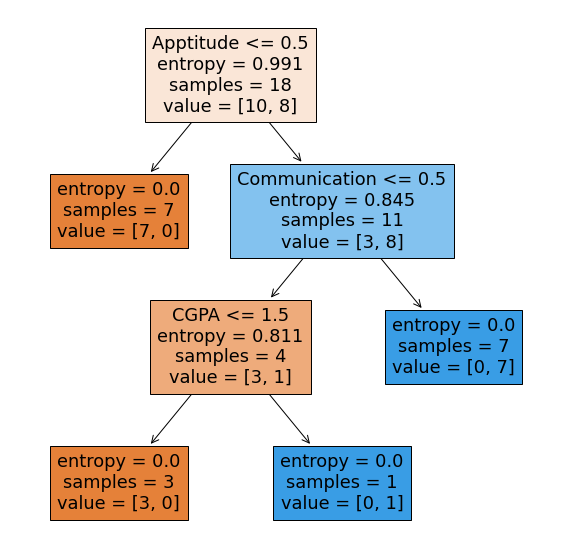

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(dtree,feature_names=list(x.columns),filled=True)
plt.show()

In [26]:
import pandas as pd
df=pd.read_csv("DecisionTree_Sports.csv")
df

,Day,Weather,Temperature,Humidity,Wind,Play_Sports?
0,Day 1,Sunny,Hot,High,Weak,No
1,Day 2,Sunny,Hot,High,Strong,No
2,Day 3,Cloudy,Hot,High,Weak,Yes
3,Day 4,Rain,Mild,High,Weak,Yes
4,Day 5,Rain,Cool,Normal,Weak,Yes
5,Day 6,Rain,Cool,Normal,Strong,No
6,Day 7,Cloudy,Cool,Normal,Strong,Yes
7,Day 8,Sunny,Mild,High,Weak,No
8,Day 9,Sunny,Cool,Normal,Weak,Yes
9,Day 10,Rain,Mild,Normal,Weak,Yes


In [33]:
import numpy as np
df['Weather']=np.where(df['Weather']=='Sunny',2,np.where(df["Weather"]=="Cloudy",1,0))
df['Temperature']=np.where(df["Temperature"]=="Hot",2,np.where(df["Temperature"]=="Mild",1,0))
df["Humidity"]=np.where(df['Humidity']=="High",1,0)
df["Wind"]=np.where(df['Wind']=="Strong",1,0)
df['Play_Sports?']=np.where(df['Play_Sports?']=="Yes",1,0)
df

,Day,Weather,Temperature,Humidity,Wind,Play_Sports?
0,Day 1,2,2,1,0,0
1,Day 2,2,2,1,1,0
2,Day 3,1,2,1,0,1
3,Day 4,0,1,1,0,1
4,Day 5,0,0,0,0,1
5,Day 6,0,0,0,1,0
6,Day 7,1,0,0,1,1
7,Day 8,2,1,1,0,0
8,Day 9,2,0,0,0,1
9,Day 10,0,1,0,0,1


In [34]:
x=df.iloc[:,1:5]
y=df.iloc[:,5]
print(x.shape)
print(y.shape)

(14, 4)
(14,)


In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy')
model=dtree.fit(x,y)
y_pred=model.predict(x)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [36]:
dtree.get_depth()

4

In [37]:
from sklearn import tree
text_representation=tree.export_text(dtree,feature_names=list(x.columns))
print(text_representation)

|--- Humidity <= 0.50
|   |--- Wind <= 0.50
|   |   |--- class: 1
|   |--- Wind >  0.50
|   |   |--- Weather <= 0.50
|   |   |   |--- class: 0
|   |   |--- Weather >  0.50
|   |   |   |--- class: 1
|--- Humidity >  0.50
|   |--- Weather <= 1.50
|   |   |--- Weather <= 0.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Weather >  0.50
|   |   |   |--- class: 1
|   |--- Weather >  1.50
|   |   |--- class: 0



In [38]:
from sklearn import metrics
cm=metrics.confusion_matrix(y,y_pred)
cm

array([[5, 0],
       [0, 9]], dtype=int64)

In [39]:
print(metrics.accuracy_score(y,y_pred))
print(metrics.recall_score(y,y_pred))#senstivity
print(metrics.recall_score(y,y_pred,pos_label=0))#specificity

1.0
1.0
1.0


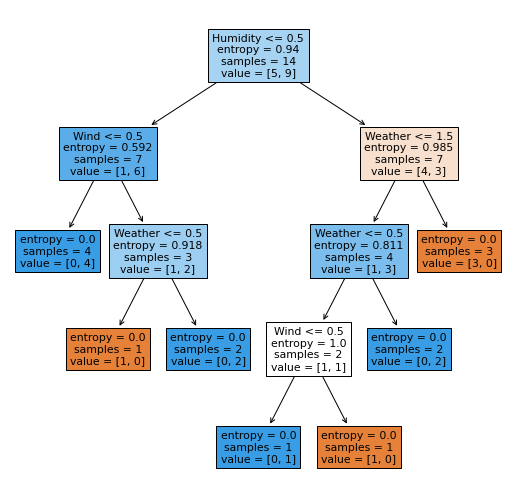

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plot_tree(dtree,feature_names=list(x.columns),filled=True)
plt.show()